In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


In [64]:
# Load and read the dataset
import pandas as pd
data = pd.read_csv(r"C:\Users\grace\Downloads\customer_segmentation_data.csv")
print(data)


       id  age  gender  income  spending_score  membership_years  \
0       1   38  Female   99342              90                 3   
1       2   21  Female   78852              60                 2   
2       3   60  Female  126573              30                 2   
3       4   40   Other   47099              74                 9   
4       5   65  Female  140621              21                 3   
..    ...  ...     ...     ...             ...               ...   
995   996   57    Male  112170              57                 6   
996   997   23   Other   65337              76                10   
997   998   23    Male  113097              40                 5   
998   999   22  Female  113695              63                 7   
999  1000   36  Female   90420               7                 2   

     purchase_frequency preferred_category  last_purchase_amount  
0                    24          Groceries                113.53  
1                    42             Sports       

In [65]:
# Shape of the dataset
print("Shape of data",data.shape)

Shape of data (1000, 9)


In [66]:
# Information of columns and data-types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [67]:
# Previewing the first 5 rows
data.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [68]:
# Previewing the last 5 rows
data.tail()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
995,996,57,Male,112170,57,6,1,Clothing,313.64
996,997,23,Other,65337,76,10,23,Groceries,632.83
997,998,23,Male,113097,40,5,42,Sports,75.09
998,999,22,Female,113695,63,7,44,Electronics,505.16
999,1000,36,Female,90420,7,2,31,Groceries,669.26


In [69]:
# Statistical summary of numeric columns
data.describe()

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


In [70]:
# Checking for missing values in each column
print(data.isnull().sum())

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64


In [71]:
# Checking the number of unique values per column
print(data.nunique())

id                      1000
age                       52
gender                     3
income                   996
spending_score           100
membership_years          10
purchase_frequency        50
preferred_category         5
last_purchase_amount     994
dtype: int64


In [72]:
# Checking the distribution of membership years
print(data["membership_years"].value_counts())

membership_years
5     125
2     109
9     108
6      96
10     96
3      95
1      95
7      94
4      94
8      88
Name: count, dtype: int64


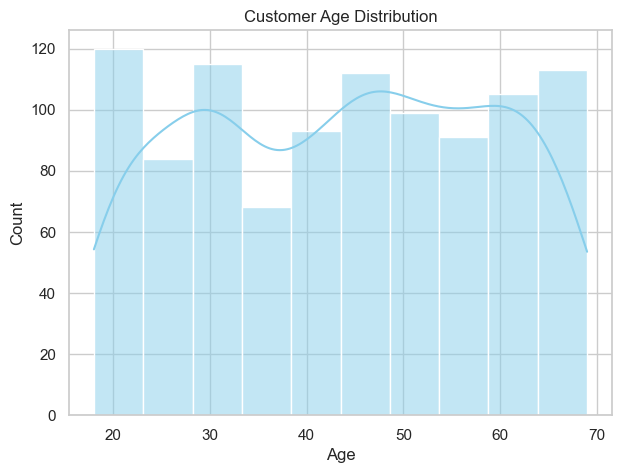

In [73]:
# Age distribution
plt.figure(figsize=(7,5))
sns.histplot(data['age'], bins=10, kde=True, color='skyblue')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


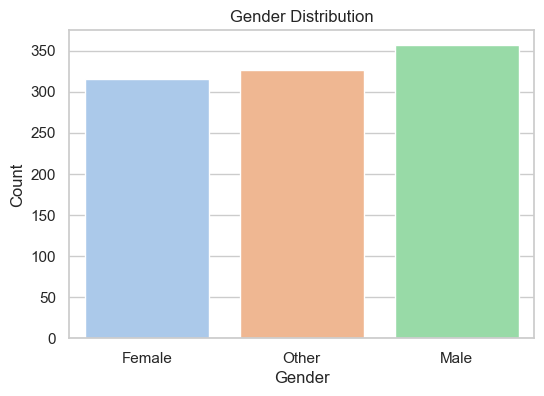

In [74]:
# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=data, hue='gender', palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


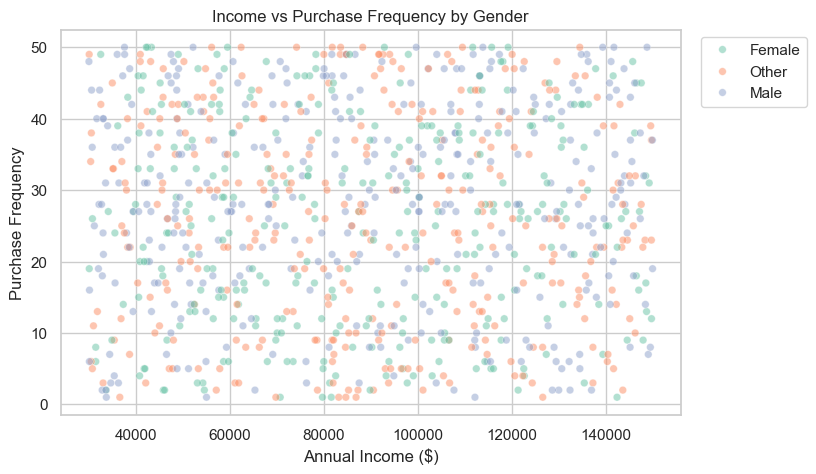

In [75]:
# Income vs Purchase Frequency 
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='income',
    y='purchase_frequency',
    data=data,
    hue='gender',
    palette='Set2',
    s=30,
    alpha=0.5
)
plt.title('Income vs Purchase Frequency by Gender')
plt.xlabel('Annual Income ($)')
plt.ylabel('Purchase Frequency')
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left')
plt.show()


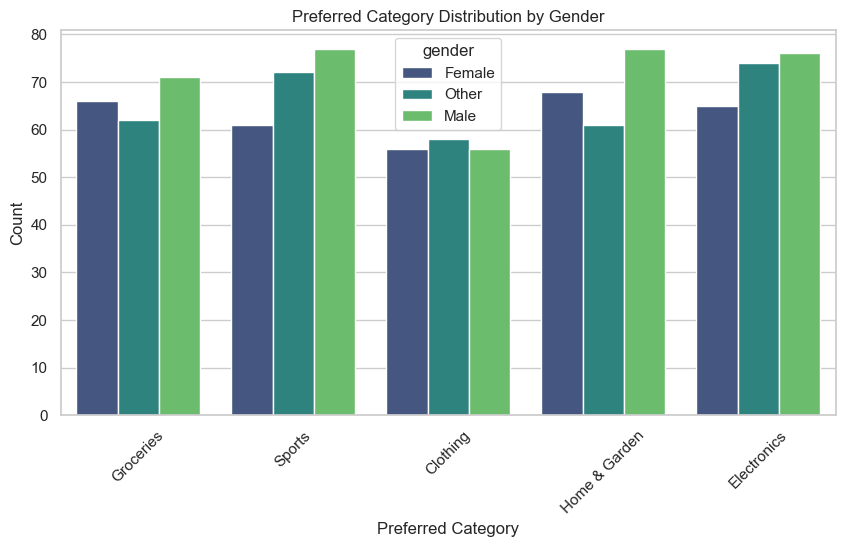

In [76]:
# Gender vs Preferred Category
plt.figure(figsize=(10,5))
sns.countplot(
    x='preferred_category',
    data=data,
    hue='gender',                  
    palette='viridis'
)
plt.title('Preferred Category Distribution by Gender')
plt.xlabel('Preferred Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [77]:
# Creating a new 'age_group' column by binning the continuous 'age' column into clear categorical ranges for analysis

data.loc[(data['age'] >= 18) & (data['age'] <= 24), 'age_group'] = '18-24'
data.loc[(data['age'] >= 25) & (data['age'] <= 34), 'age_group'] = '25-34'
data.loc[(data['age'] >= 35) & (data['age'] <= 44), 'age_group'] = '35-44'
data.loc[(data['age'] >= 45) & (data['age'] <= 54), 'age_group'] = '45-54'
data.loc[(data['age'] >= 55) & (data['age'] <= 64), 'age_group'] = '55-64'
data.loc[(data['age'] >= 65), 'age_group'] = '65-70'


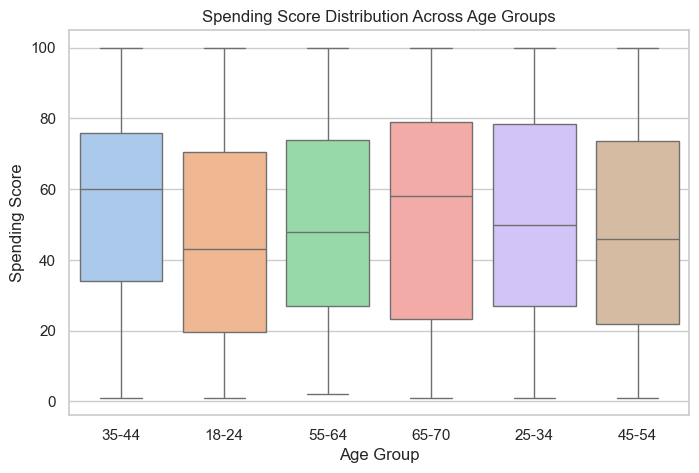

In [78]:
# Age vs Spending Score
plt.figure(figsize=(8,5))
sns.boxplot(
    x='age_group',
    y='spending_score',
    data=data,
    hue='age_group',
    palette='pastel'
)
plt.title('Spending Score Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Spending Score')
plt.show()


In [79]:
# Creating a DataFrame with only numeric columns to compute correlation heatmap without errors from categorical data

numeric_data = data.select_dtypes(include='number')

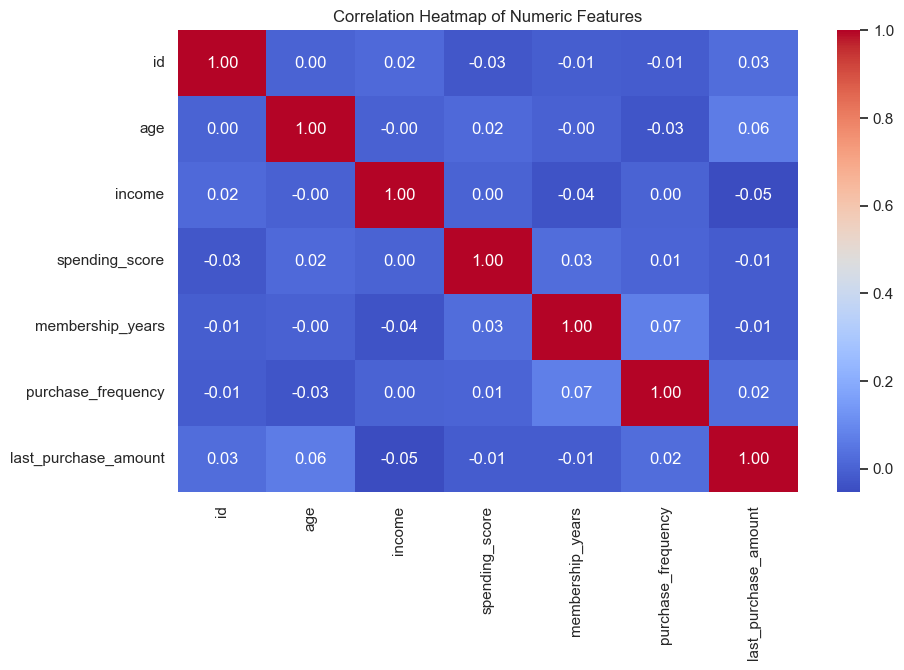

In [80]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(
    numeric_data.corr(),
    annot=True,            
    cmap='coolwarm',       
    fmt=".2f"               
)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()
